In [7]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
import tensorflow as tf
from tensorflow.python.framework import ops
from cnn_utils import *

%matplotlib inline
np.random.seed(1)

In [8]:
tf.version

<module 'tensorflow._api.v2.version' from 'D:\\environment\\anaconda\\lib\\site-packages\\tensorflow\\_api\\v2\\version\\__init__.py'>

In [9]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

y = 0


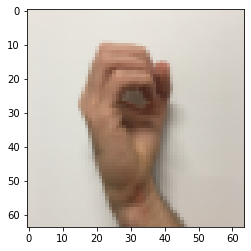

In [10]:
# Example of a picture
index = 20
plt.imshow(X_train_orig[index])
print ("y = " + str(np.squeeze(Y_train_orig[:, index])))
#从数组的形状中删除单维度条目，即把shape中为1的维度去掉

In [23]:
X_train = X_train_orig/255.
X_test = X_test_orig/255.
Y_train = np.eye(6)[Y_train_orig.reshape(-1)]
Y_test = np.eye(6)[Y_test_orig.reshape(-1)]
#np.eye()的函数，除了生成对角阵外，还可以将一个label数组，大小为(1,m)或者(m,1)的数组，转化成one-hot数组。
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))
conv_layers = {}

number of training examples = 1080
number of test examples = 120
X_train shape: (1080, 64, 64, 3)
Y_train shape: (1080, 6)
X_test shape: (120, 64, 64, 3)
Y_test shape: (120, 6)


In [39]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(64,(4,4),padding='same',activation='relu',input_shape=(64,64,3)))
model.add(tf.keras.layers.MaxPool2D((8,8),strides=8,padding='same'))
model.add(tf.keras.layers.Conv2D(64,(2,2),activation='relu',padding='same'))
model.add(tf.keras.layers.MaxPool2D((4,4),strides=4,padding='same'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64,activation='relu'))
model.add(tf.keras.layers.Dense(6))

In [40]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 64, 64, 64)        3136      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 64)          16448     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                16448     
_________________________________________________________________
dense_1 (Dense)              (None, 6)                

In [45]:
model.compile(optimizer='adam',
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
metrics=['accuracy'])
history=model.fit(X_train,Y_train_orig.reshape((-1,1)),epochs=100,validation_data=(X_test,Y_test_orig.reshape((-1,1))))

Epoch 1/100
34/34 [==============================] - 2s 59ms/step - loss: 1.8010 - accuracy: 0.1685 - val_loss: 1.7864 - val_accuracy: 0.1750
Epoch 2/100
34/34 [==============================] - 2s 55ms/step - loss: 1.7744 - accuracy: 0.2250 - val_loss: 1.7536 - val_accuracy: 0.2500
Epoch 3/100
34/34 [==============================] - 2s 55ms/step - loss: 1.7265 - accuracy: 0.3009 - val_loss: 1.6813 - val_accuracy: 0.3667
Epoch 4/100
34/34 [==============================] - 2s 55ms/step - loss: 1.5736 - accuracy: 0.4269 - val_loss: 1.4650 - val_accuracy: 0.5083
Epoch 5/100
34/34 [==============================] - 2s 54ms/step - loss: 1.2784 - accuracy: 0.5315 - val_loss: 1.1842 - val_accuracy: 0.5167
Epoch 6/100
34/34 [==============================] - 2s 56ms/step - loss: 1.0504 - accuracy: 0.6269 - val_loss: 1.0540 - val_accuracy: 0.5667
Epoch 7/100
34/34 [==============================] - 2s 55ms/step - loss: 0.9501 - accuracy: 0.6398 - val_loss: 0.8458 - val_accuracy: 0.7250
Epoch 

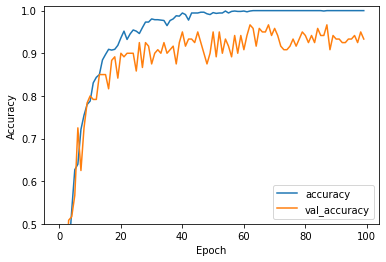

In [48]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1.01])
plt.legend(loc='lower right')
plt.show()

In [56]:
test_loss, test_acc = model.evaluate(X_test,Y_test_orig.reshape((-1,1)),verbose=2)

4/4 - 0s - loss: 0.1796 - accuracy: 0.9333
